In [1]:
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from Model_1 import *

In [3]:
from Model_2 import *

Using TensorFlow backend.


Have you ever wanted to make your text messages more expressive? Your emojifier app will help you do that. So rather than writing "Congratulations on the promotion! Lets get coffee and talk. Love you!" the emojifier can automatically turn this into "Congratulations on the promotion! 👍 Lets get coffee and talk. ☕️ Love you! ❤️"

Two models are implemented. They input a sentence (such as "Let's go see the baseball game tonight!") and find the most appropriate emoji to be used with this sentence (⚾️).

## Dataset EMOJISET

- X contains 127 sentences (strings)
- Y contains a integer label between 0 and 4 corresponding to an emoji for each sentence

<img src="images/data_set.png" style="width:700px;height:300px;">
<caption><center> 
Let's load the dataset using the code below.

In [5]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/tesss.csv')

In [6]:
maxLen = len(max(X_train, key=len).split())

In [7]:
print(X_train[0], label_to_emoji(Y_train[0]))
print(X_train[1], label_to_emoji(Y_train[1]))
print(X_train[2], label_to_emoji(Y_train[2]))
print(X_train[3], label_to_emoji(Y_train[3]))
print(X_train[4], label_to_emoji(Y_train[4]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴


In [8]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

Using pretrained word embeddings

In [9]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

## Model-1

<center>
<img src="images/emojifierv1.png" style="width:900px;height:300px;">
<caption><center> 
</center>

The input of the model is a string corresponding to a sentence (e.g. "I love you). In the code, the output is a probability vector of shape (1,5), that is passed in an argmax layer to extract the index of the most likely emoji output.

In [10]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)

Epoch: 0 --- cost = 1.88342378571
Accuracy: 0.318181818182
Epoch: 100 --- cost = 0.0699891210417
Accuracy: 0.931818181818
Epoch: 200 --- cost = 0.0418992146179
Accuracy: 0.954545454545
Epoch: 300 --- cost = 0.0334994286393
Accuracy: 0.969696969697


In [11]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.977272727273
Test set:
Accuracy: 0.892857142857


## Error analysis

In [12]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.833333333333

i adore you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😄


(56,)
           ❤️    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            1    0   17    0    0   18
3            1    1    2   12    0   16
4            0    0    0    0    7    7
All          8    9   19   13    7   56


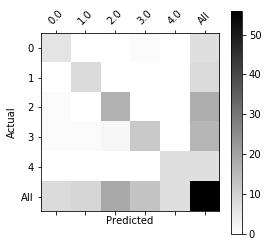

In [13]:
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

## 2 - Model-2: LSTM: 

This model is able to take word ordering into account. Model_2 also uses pre-trained word embeddings to represent words, but feeds them into an LSTM, whose job is to predict the most appropriate emoji. 



<img src="images/emojifier-v2.png" style="width:700px;height:400px;"> <br>
<caption><center>




In [14]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform

In [59]:
model = model_lstm((maxLen,), word_to_vec_map, word_to_index, prob1=0.2, prob2=0.3)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_17 (LSTM)               (None, 10, 128)           91648     
_________________________________________________________________
dropout_17 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 645       
__________

In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 5)

In [62]:
model.fit(X_train_indices, Y_train_oh, epochs = 50, batch_size = 10, shuffle=True)

Epoch 1/50
132/132 [==============================] - 3s 25ms/step - loss: 1.5730 - acc: 0.2500
Epoch 2/50
132/132 [==============================] - 1s 4ms/step - loss: 1.4232 - acc: 0.4091
Epoch 3/50
132/132 [==============================] - 1s 5ms/step - loss: 1.2200 - acc: 0.5076
Epoch 4/50
132/132 [==============================] - 1s 5ms/step - loss: 1.0349 - acc: 0.5379
Epoch 5/50
132/132 [==============================] - 1s 5ms/step - loss: 0.8065 - acc: 0.7197
Epoch 6/50
132/132 [==============================] - 1s 5ms/step - loss: 0.7639 - acc: 0.6970
Epoch 7/50
132/132 [==============================] - 1s 5ms/step - loss: 0.6139 - acc: 0.7576
Epoch 8/50
132/132 [==============================] - 1s 5ms/step - loss: 0.5594 - acc: 0.7955
Epoch 9/50
132/132 [==============================] - 1s 5ms/step - loss: 0.4047 - acc: 0.8636
Epoch 10/50
132/132 [==============================] - 1s 5ms/step - loss: 0.3182 - acc: 0.8864
Epoch 11/50
132/132 [===========================

In [63]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

56/56 [==============================] - 1s 12ms/step

Test accuracy =  0.892857142857


## Error analysis

In [64]:
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

Expected emoji:😄 prediction: he got a very nice raise	❤️
Expected emoji:😄 prediction: she got me a nice present	❤️
Expected emoji:😞 prediction: This girl is messing with me	❤️
Expected emoji:❤️ prediction: I love taking breaks	😞
Expected emoji:😄 prediction: you brighten my day	❤️
Expected emoji:😞 prediction: she is a bully	❤️


In [65]:
x_test = np.array(['I love you'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

I love you ❤️


In [66]:
x_test = np.array(['I am happy'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

I am happy 😄


In [67]:
x_test = np.array(['I am sad'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

I am sad 😞


In [68]:
x_test = np.array(['I want to eat'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

I want to eat 🍴


In [69]:
x_test = np.array(['I like to play football'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

I like to play football ⚾


In [70]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('https://www.kaggle.com/devjyotichandra/glove6b50dtxt/downloads/glove.6B.50d.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'https://www.kaggle.com/devjyotichandra/glove6b50dtxt/downloads/glove.6B.50d.txt'